# Подход 1: Градиентный бустинг

In [ ]:
import pandas as pd

data = pd.read_csv('data/features.csv')
data

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,4,3,1,13.0,2130,0,0,1830,0,63
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,3,3,0,-16.0,2449,0,4,1974,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,114402,1450265551,1,47,4,1706,1198,17,0,1,...,4,3,0,-24.0,2032,0,1792,1975,48,63
97226,114403,1450277704,0,43,4,1793,1416,17,0,1,...,3,2,0,-17.0,1734,1,2038,6,63,3
97227,114404,1450291848,1,98,4,1399,540,1,0,0,...,1,3,1,-15.0,2906,0,1796,1846,51,63
97228,114405,1450292986,1,100,3,1135,766,6,0,2,...,3,3,1,-42.0,951,0,2039,2047,63,63


In [ ]:
y = data['radiant_win']
print('Столбец, содержащий целевую выборку называется "radiant_win"')
excess_columns = list(data.columns.values[(len(data.columns) - 6):])
data = data.drop(columns=excess_columns)

count = data.count()
ls = []
max_num = max(count)
for i in range(0, len(count)):
    col = count.index[i]
    if count[col] != max_num:
        ls.append(col)
print('Следующие признаки имеют пропуски: {0}'.format(', '.join(ls)))
print('Пропуски связаны с тем, что игра могла закончится до поднятия уровня курьера или bottle никто в командах не купил')

Столбец, содержащий целевую выборку называется "radiant_win"
Следующие признаки имеют пропуски: first_blood_time, first_blood_team, first_blood_player1, first_blood_player2, radiant_bottle_time, radiant_courier_time, radiant_flying_courier_time, radiant_first_ward_time, dire_bottle_time, dire_courier_time, dire_flying_courier_time, dire_first_ward_time
Пропуски связаны с тем, что игра могла закончится до поднятия уровня курьера или bottle никто в командах не купил


In [ ]:
# Тк существуют пропуски, их нужно чем-то заполнить,
# чисто из бытейских соображений, если нет данных, то 
# игра завершилась до этого момента, тогда лучше взять максимальное значение
data_filled = data.fillna(data.max())
data_filled

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,114402,1450265551,1,47,4,1706,1198,17,0,1,...,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0
97226,114403,1450277704,0,43,4,1793,1416,17,0,1,...,0,-5.0,300.0,-82.0,300.0,4,3,2,0,-17.0
97227,114404,1450291848,1,98,4,1399,540,1,0,0,...,2,-32.0,249.0,-70.0,300.0,1,1,3,1,-15.0
97228,114405,1450292986,1,100,3,1135,766,6,0,2,...,0,-21.0,254.0,-85.0,183.0,5,3,3,1,-42.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import datetime

In [ ]:
data_test = pd.read_csv('data/features_test.csv')
data_test_filled = data_test.fillna(data.max())
data_test_filled

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,6,1430287923,0,93,4,1103,1089,8,0,1,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
1,7,1430293357,1,20,2,556,570,1,0,0,...,2,-29.0,168.0,-54.0,300.0,3,2,2,1,16.0
2,10,1430301774,1,112,2,751,808,1,0,0,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
3,13,1430323933,1,27,3,708,903,1,1,1,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
4,16,1430331112,1,39,4,1259,661,4,0,0,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17172,114369,1450212780,7,11,5,2054,1941,27,0,1,...,1,8.0,253.0,-87.0,300.0,4,3,2,1,-33.0
17173,114377,1450222875,1,3,3,748,605,1,0,0,...,1,-1.0,133.0,-85.0,184.0,2,3,4,1,-18.0
17174,114378,1450223593,1,85,2,575,499,0,0,0,...,0,20.0,133.0,-88.0,239.0,4,4,4,0,-36.0
17175,114393,1450244771,0,7,4,1844,1176,8,1,2,...,0,-28.0,300.0,-83.0,300.0,1,4,1,0,300.0


In [ ]:
X_test = data_test_filled.values
X_train = data_filled.values
y_train = y.values
def func(X_train, y_train, count):
    start_time = datetime.datetime.now()
    clf = GradientBoostingClassifier(n_estimators=count, learning_rate=0.1, verbose=True, random_state=241, max_depth=3)
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cvs = cross_val_score(clf, X=X_train, y=y_train, scoring='roc_auc', cv=kf)
    cvs_value = cvs.mean()
    print('Estimators: {0}\nCross val score: {1}\nTime pass: {2}'
          .format(count, cvs_value, datetime.datetime.now() - start_time))
    return cvs_value

In [ ]:
trees = [10, 20, 30 , 40, 50, 100, 200]
scores = []
for i in trees:
    scores.append(func(X_train, y_train, i))

      Iter       Train Loss   Remaining Time 
         1           1.3789           12.01s
         2           1.3734           10.28s
         3           1.3685            8.98s
         4           1.3642            7.70s
         5           1.3592            6.41s
         6           1.3547            5.12s
         7           1.3502            3.84s
         8           1.3460            2.55s
         9           1.3420            1.27s
        10           1.3384            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3791           11.10s
         2           1.3737            9.87s
         3           1.3690            8.63s
         4           1.3644            7.41s
         5           1.3596            6.17s
         6           1.3550            4.94s
         7           1.3505            3.71s
         8           1.3462            2.48s
         9           1.3421            1.24s
        10           1.3382            0.00s
      It

        30           1.2881            0.00s
Estimators: 30
Cross val score: 0.6899489423233114
Time pass: 0:03:11.487096
      Iter       Train Loss   Remaining Time 
         1           1.3789           52.24s
         2           1.3734           50.16s
         3           1.3685           48.57s
         4           1.3642           47.01s
         5           1.3592           45.50s
         6           1.3547           44.09s
         7           1.3502           42.68s
         8           1.3460           41.32s
         9           1.3420           39.99s
        10           1.3384           38.64s
        20           1.3083           25.79s
        30           1.2879           12.85s
        40           1.2727            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3791           47.57s
         2           1.3737           46.39s
         3           1.3690           45.14s
         4           1.3644           44.02s
         5           

        20           1.3081            1.68m
        30           1.2877            1.47m
        40           1.2726            1.26m
        50           1.2612            1.05m
        60           1.2521           50.48s
        70           1.2448           38.13s
        80           1.2386           25.43s
        90           1.2332           12.72s
       100           1.2284            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3786            2.04m
         2           1.3732            2.02m
         3           1.3683            2.00m
         4           1.3635            1.98m
         5           1.3586            1.96m
         6           1.3538            1.94m
         7           1.3494            1.92m
         8           1.3455            1.90m
         9           1.3416            1.88m
        10           1.3376            1.85m
        20           1.3073            1.65m
        30           1.2870            1.45m
        4

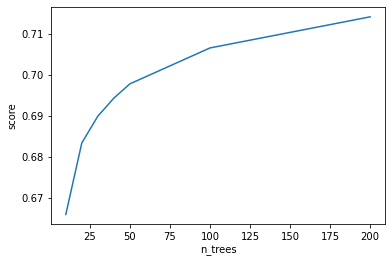

In [ ]:
# Построим графики для вывода
import matplotlib.pyplot as plot
%matplotlib inline
plot.plot(trees, scores)
plot.xlabel('n_trees')
plot.ylabel('score')
plot.show()

# Ответы на вопросы

1) Какие признаки имеют пропуски среди своих значений (приведите полный список имен этих признаков)? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?

Следующие признаки имеют пропуски: first_blood_time, first_blood_team, first_blood_player1, first_blood_player2, radiant_bottle_time, radiant_courier_time, radiant_flying_courier_time, radiant_first_ward_time, dire_bottle_time, dire_courier_time, dire_flying_courier_time, dire_first_ward_time
Пропуски связаны с тем, в первые пять минут игры не все игроки покупают "courier" или "dire_first_ward_time"

2) Как называется столбец, содержащий целевую переменную?

"radiant_win" - победа сил света

3) Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Какое качество при этом получилось?

Для 30 деревьев кросс-валидация проводилась 3мин 11.5сек. Качество auc_roc: 0.69

4) Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что можно сделать, чтобы ускорить его обучение при увеличении количества деревьев?

Если важно увеличить качество, то имеет смысл использовать более 30 деревьев. Для ускорения обучения можно уменьшить параметр max_depth.

# Подход 2: Логистическая регрессия

In [2]:
import pandas as pd

data = pd.read_csv('features.csv')
data_test = pd.read_csv('features_test.csv')

y = data['radiant_win']
excess_columns = list(data.columns.values[(len(data.columns) - 6):])
data = data.drop(columns=excess_columns)
data_filled = data.fillna(data.max())
data_test_filled = data_test.fillna(data.max())
X_test = data_test_filled.values
X_train = data_filled.values
y_train = y.values

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import datetime

In [4]:
values = np.power(10.0, np.arange(-5, 6))
for C in values:
    start_time = datetime.datetime.now()
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    lr = LogisticRegression(C=C, random_state=241)
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cvs = cross_val_score(lr, X=X_train, y=y_train, scoring='roc_auc', cv=kf, n_jobs=-1)
    cvs_value = cvs.mean()
    print('C: {0}\nCross val score: {1}\nTime pass: {2}'
          .format(C, cvs_value, datetime.datetime.now() - start_time))

C: 1e-05
Cross val score: 0.6964001361132015
Time pass: 0:00:03.166973
C: 0.0001
Cross val score: 0.7121484818721997
Time pass: 0:00:02.408327
C: 0.001
Cross val score: 0.7169249717541452
Time pass: 0:00:03.885707
C: 0.01
Cross val score: 0.7171164484649248
Time pass: 0:00:05.259155
C: 0.1
Cross val score: 0.7170897183215901
Time pass: 0:00:05.449544
C: 1.0
Cross val score: 0.7170863943845064
Time pass: 0:00:05.481625
C: 10.0
Cross val score: 0.7170861423518168
Time pass: 0:00:05.470429
C: 100.0
Cross val score: 0.7170858733223404
Time pass: 0:00:05.593250
C: 1000.0
Cross val score: 0.7170858521333344
Time pass: 0:00:05.504125
C: 10000.0
Cross val score: 0.7170858881537445
Time pass: 0:00:05.477594
C: 100000.0
Cross val score: 0.7170858902731567
Time pass: 0:00:05.483350


**Ответ на 1 вопрос**

При C=0.01 cvs=0.7171164484649248 Результат лучше использования двухсот деревьев в градиентном бустинге как по качеству (незначительно), так и по времени (значительно!). Однако использование большего числа деревьев, вероятно, даст более хорошее качество, но и по времени такой алгоритм просядет еще больше, тк уже сейчас 200 деревьев против C=0.01 соотносится по времени как 20:59.8 к 00:05.26

In [7]:
data = pd.read_csv('features.csv')
excess_columns = list(data.columns.values[(len(data.columns) - 6):])
data = data.drop(columns=excess_columns)
data = data.drop(columns=['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 
                  'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'])
data_filled = data.fillna(0)
X_train = data_filled.values

In [8]:
for C in values:
    start_time = datetime.datetime.now()
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    lr = LogisticRegression(C=C, random_state=241)
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cvs = cross_val_score(lr, X=X_train, y=y_train, scoring='roc_auc', cv=kf, n_jobs=-1)
    cvs_value = cvs.mean()
    print('C: {0}\nCross val score: {1}\nTime pass: {2}'
          .format(C, cvs_value, datetime.datetime.now() - start_time))

C: 1e-05
Cross val score: 0.695149171969405
Time pass: 0:00:02.595937
C: 0.0001
Cross val score: 0.7114122313361925
Time pass: 0:00:02.033270
C: 0.001
Cross val score: 0.7164688215391551
Time pass: 0:00:03.289779
C: 0.01
Cross val score: 0.7166570803645437
Time pass: 0:00:04.211378
C: 0.1
Cross val score: 0.7166360515348569
Time pass: 0:00:04.463593
C: 1.0
Cross val score: 0.7166321601079331
Time pass: 0:00:04.562122
C: 10.0
Cross val score: 0.7166320414716406
Time pass: 0:00:04.580892
C: 100.0
Cross val score: 0.7166319673194688
Time pass: 0:00:04.569503
C: 1000.0
Cross val score: 0.7166319588460237
Time pass: 0:00:04.535579
C: 10000.0
Cross val score: 0.7166319546073883
Time pass: 0:00:04.567461
C: 100000.0
Cross val score: 0.71663195672597
Time pass: 0:00:04.595600


**Ответ на 2 вопрос**

Качество практически не изменились, разве что слегка ухудшилось. Это связано с тем, что представленные категориальные признаки очень плохо представленны в выборке. Необходимо их изменить так, чтобы они играли большую роль в обучении.

In [9]:
data = pd.read_csv('features.csv')
heroes = data[['r1_hero', 'd1_hero', 'r2_hero', 'd2_hero', 'r3_hero', 'd3_hero', 
               'r4_hero', 'd4_hero', 'r5_hero', 'd5_hero']]
features_category = data[['lobby_type', 'r1_hero', 'd1_hero', 'r2_hero', 'd2_hero', 'r3_hero', 'd3_hero', 
               'r4_hero', 'd4_hero', 'r5_hero', 'd5_hero']]
len(np.unique(heroes))

108

**Ответ на 3 вопрос**

Исходя из данных, в игре 108 уникальных идентификаторов героев

In [10]:
data = pd.read_csv('features.csv', index_col='match_id')
excess_columns = list(data.columns.values[(len(data.columns) - 6):])
y_train = data['radiant_win'].values
data = data.drop(columns=excess_columns)

new_data = data.drop(columns = features_category)
data_filled = data.fillna(0)
X_train = data_filled.values

heroes_val = heroes.values
N_max = max(np.unique(heroes_val))
X_pick = np.zeros((heroes.shape[0], N_max))
data_filled = data_filled.drop(columns=features_category)

for i, match_id in enumerate(data.index):
  for p in range(0,5):
    X_pick[i, data.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
    X_pick[i, data.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

heroes = pd.DataFrame(X_pick, index=data.index)
X_train_all = pd.concat([data_filled, heroes], axis=1)

In [11]:
X_train = X_train_all.values
values = np.power(10.0, np.arange(-5, 6))

for C in values:
    start_time = datetime.datetime.now()
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    lr = LogisticRegression(C=C, random_state=241, n_jobs=-1)
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cvs = cross_val_score(lr, X=X_train, y=y_train, scoring='roc_auc', cv=kf, n_jobs=-1)
    cvs_value = cvs.mean()
    print('C: {0}\nCross val score: {1}\nTime pass: {2}'
          .format(C, cvs_value, datetime.datetime.now() - start_time))

C: 1e-05
Cross val score: 0.7147781038557255
Time pass: 0:00:04.297257
C: 0.0001
Cross val score: 0.7427271252298328
Time pass: 0:00:03.923921
C: 0.001
Cross val score: 0.7516116548089558
Time pass: 0:00:06.577878
C: 0.01
Cross val score: 0.7519639455861148
Time pass: 0:00:09.351074
C: 0.1
Cross val score: 0.7519296127153968
Time pass: 0:00:10.234203
C: 1.0
Cross val score: 0.7519244690811582
Time pass: 0:00:10.167606
C: 10.0
Cross val score: 0.7519241577673921
Time pass: 0:00:10.191545
C: 100.0
Cross val score: 0.7519241366014189
Time pass: 0:00:10.426387
C: 1000.0
Cross val score: 0.7519240942211259
Time pass: 0:00:10.223334
C: 10000.0
Cross val score: 0.7519240793893778
Time pass: 0:00:10.221127
C: 100000.0
Cross val score: 0.751924081508455
Time pass: 0:00:10.437900


**Ответ на 4 вопрос**

Качество улучшилось до 0.7519639455861148. Это связано с тем, что до "мешка слов" у нас в таблице был просто набор из индексов героев, никак не влияющий на выборку (почти, как мы убедились ранее). Сейчас же, имеется довольно логичное и понятное представленние героев.

In [12]:
data_test = pd.read_csv('features_test.csv', index_col='match_id')
features_category = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 
                  'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
heroes = data_test.loc[:, features_category[1:]]

new_data_test = data_test.drop(columns = features_category)
data_test_filled = new_data_test.fillna(0)
heroes_test_value = heroes.values
N_max = max(np.unique(heroes_test_value))
X_pick = np.zeros((heroes.shape[0], N_max))

for i, match_id in enumerate(data_test.index):
  for p in range(0,5):
    X_pick[i, data_test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
    X_pick[i, data_test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
heroes = pd.DataFrame(X_pick, index=data_test.index)
X = pd.concat([data_test_filled, heroes], axis=1)
X_test = X.values

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
logreg = LogisticRegression(C = 0.01,  random_state=241, n_jobs=-1)
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict_proba(X_test)
y_pred_train = logreg.predict_proba(X_train)
y_pred = pd.DataFrame(y_pred_test, columns=['radiant_lose', 'radiant_win'])
y_pred

,radiant_lose,radiant_win
0,0.177229,0.822771
1,0.243914,0.756086
2,0.811213,0.188787
3,0.143190,0.856810
4,0.758401,0.241599
...,...,...
17172,0.281103,0.718897
17173,0.368491,0.631509
17174,0.766171,0.233829
17175,0.368786,0.631214


In [14]:
print('max: ', y_pred['radiant_win'].max())
print('min: ', y_pred['radiant_win'].min())

max:  0.9963305890721815
min:  0.008721474723083765


**Ответ на 5 вопрос**

Максимальное значение прогноза на тестовой выборке: 0.9963305890721815

Минимальное значение прогноза на тестовой выборке: 0.008721474723083765